Q2) Salary_hike -> Build a prediction model for Salary_hike.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
import pandas as pd
Salary=pd.read_csv('Salary_Data.csv')
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


PLOTTING DISTRIBUTION PLOT:

Here both datas are highly correlated and no null vaules too.

<ipython-input-7-c2d93f63ea72>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

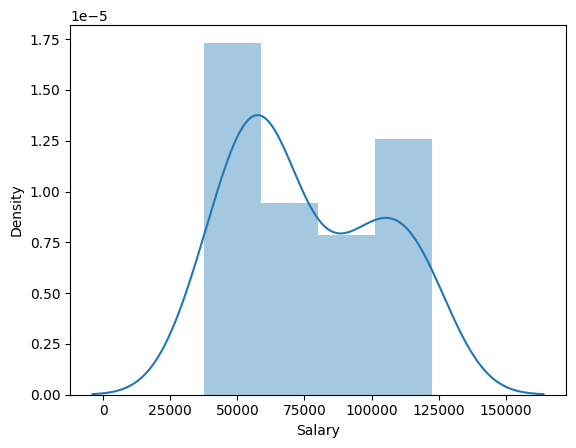

In [7]:
import seaborn as sns
sns.distplot(Salary['Salary'])

<ipython-input-8-e98792c66808>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

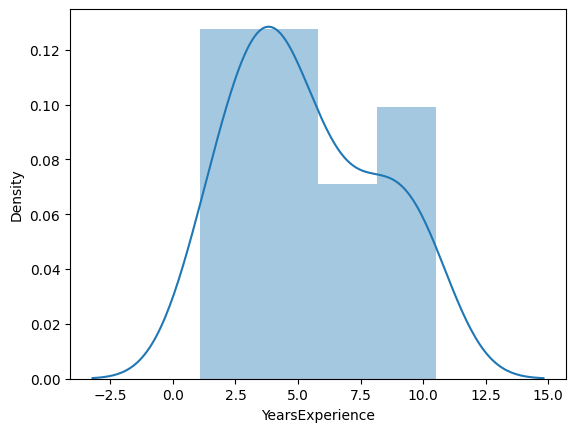

In [8]:
sns.distplot(Salary['YearsExperience'])

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=Salary).fit()

<Axes: xlabel='Salary', ylabel='YearsExperience'>

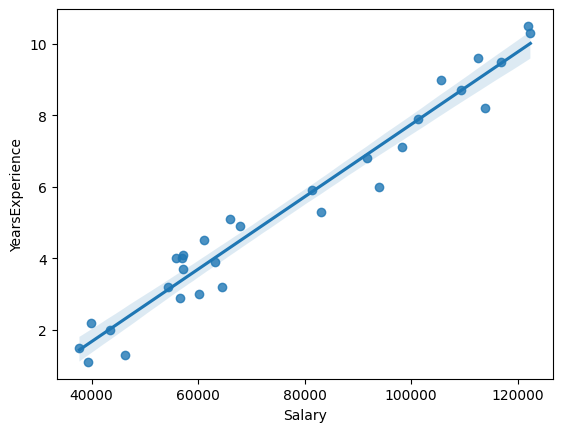

In [10]:
import seaborn as sns
sns.regplot(x='Salary',y="YearsExperience",data=Salary)

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [13]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

Since p-value is less then 0.05 for 'YearsExperience' variable,
we can say that it is a significant variable in predicting the dependent variable 'Salary'

In [14]:
Salary['Predicted_Values']=model.fittedvalues
Salary['Error']=model.resid
Salary['Error_squared']=Salary['Error']**2
Salary

,YearsExperience,Salary,Predicted_Values,Error,Error_squared
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07


In [15]:
import numpy as np
RMSE=np.sqrt((model.resid**2).mean())
RMSE

5592.043608760662

In [16]:
newdata=pd.Series([5,10,15,20])
newdata

0     5
1    10
2    15
3    20
dtype: int64

In [17]:
newspredicted=pd.DataFrame(newdata,columns=['YearsExperience'])
newspredicted

,YearsExperience
0,5
1,10
2,15
3,20


In [18]:
model.predict(newspredicted)

0     73042.011806
1    120291.823413
2    167541.635020
3    214791.446628
dtype: float64

In [19]:
newspredicted['Salary_Predicted']=model.predict(newspredicted)
newspredicted

,YearsExperience,Salary_Predicted
0,5,73042.011806
1,10,120291.823413
2,15,167541.635020
3,20,214791.446628


Transformations

1) Log Tranformation

<ipython-input-20-cff732cf1aca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Log_exp)


<Axes: xlabel='YearsExperience', ylabel='Density'>

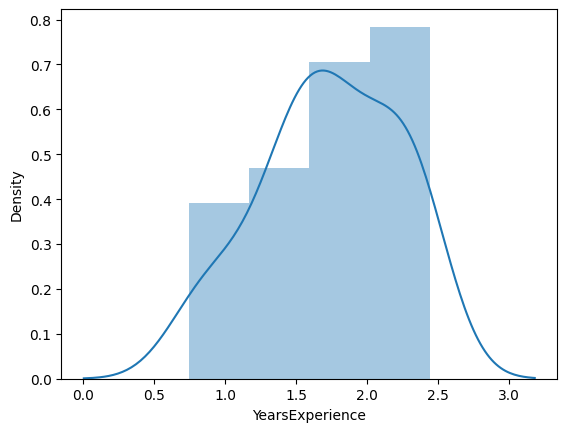

In [20]:
Log_exp=np.log1p(Salary['YearsExperience'])
sns.distplot(Log_exp)

<ipython-input-21-b410ad36d7f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Log_salary)


<Axes: xlabel='Salary', ylabel='Density'>

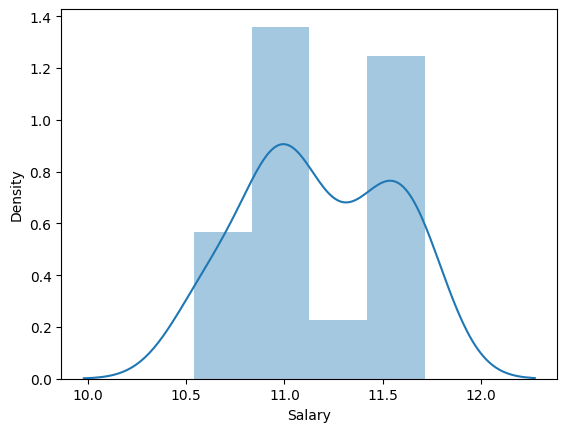

In [21]:
Log_salary=np.log1p(Salary['Salary'])
sns.distplot(Log_salary)

In [22]:
model_log=smf.ols('Log_exp~Log_salary',data=Salary).fit()
RMSE_Log=np.sqrt((model_log.resid**2).mean())
RMSE_Log

0.1265261690018765

2) SQUARE ROOT Transformation

<ipython-input-23-a9091ae70d4f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sqrt_SALARY)


<Axes: xlabel='Salary', ylabel='Density'>

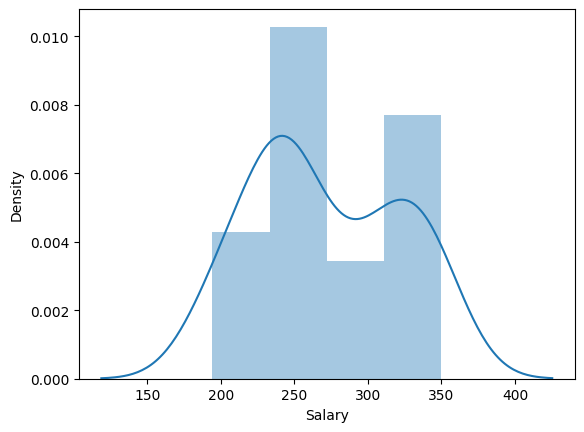

In [23]:
import numpy as np
Sqrt_SALARY=np.sqrt(Salary['Salary'])
sns.distplot(Sqrt_SALARY)

<ipython-input-24-75078dec89ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sqrt_YE)


<Axes: xlabel='YearsExperience', ylabel='Density'>

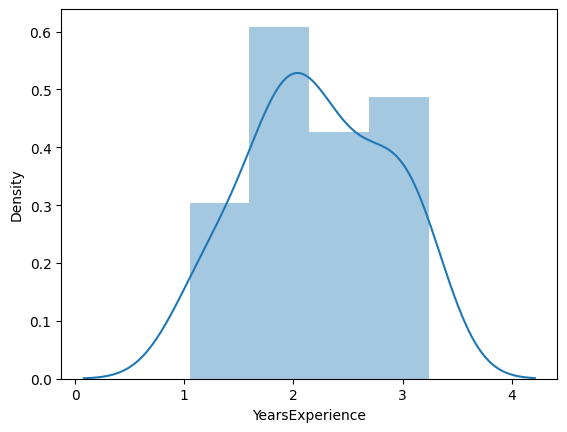

In [24]:
Sqrt_YE=np.sqrt(Salary['YearsExperience'])
sns.distplot(Sqrt_YE)

In [25]:
model_sqrt=smf.ols('Sqrt_YE~Sqrt_SALARY',data=Salary).fit()
RMSE_SQRT=np.sqrt((model_sqrt.resid**2).mean())
RMSE_SQRT

0.15098793085865858

3) SQUARE Tranformation

<ipython-input-26-14336cd704d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sqr_SALARY)


<Axes: xlabel='Salary', ylabel='Density'>

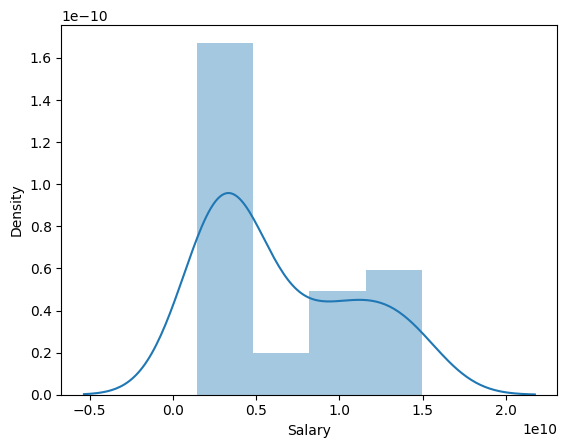

In [26]:
Sqr_SALARY=(Salary['Salary'])**2
sns.distplot(Sqr_SALARY)

<ipython-input-27-c083d4fdddd2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sqr_YE)


<Axes: xlabel='YearsExperience', ylabel='Density'>

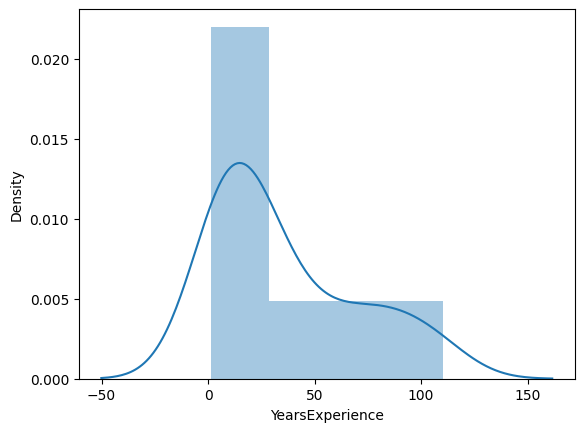

In [27]:
Sqr_YE=(Salary['YearsExperience'])**2
sns.distplot(Sqr_YE)

In [28]:
model_sqr=smf.ols('Sqr_YE~Sqr_SALARY',data=Salary).fit()
RMSE_SQR=np.sqrt((model_sqr.resid**2).mean())
RMSE_SQR

7.117486572354788